<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Production-and-Operations-Management/blob/main/payoff_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Payoff Table (위치 A, B, C와 각 수요 상태에 따른 이익)
payoff_table = pd.DataFrame({
    '수요가 낮음': [100, 150, 120],
    '수요가 중간': [200, 250, 220],
    '수요가 높음': [300, 350, 320]
}, index=['위치 A', '위치 B', '위치 C'])

# 각 대안의 최소 결과에서 최대값을 찾는 Maximin 기준
def maximin(payoff_table):
    min_payoffs = payoff_table.min(axis=1)  # 각 대안에서의 최소 이익
    return min_payoffs.idxmax(), min_payoffs.max()  # 최소값 중 최대값을 가진 대안

# 각 대안의 최대 결과에서 최대값을 찾는 Maximax 기준
def maximax(payoff_table):
    max_payoffs = payoff_table.max(axis=1)  # 각 대안에서의 최대 이익
    return max_payoffs.idxmax(), max_payoffs.max()  # 최대값 중 최대값을 가진 대안

# 후회 최소화 (Minimax Regret)
def minimax_regret(payoff_table):
    max_in_columns = payoff_table.max(axis=0)  # 각 수요 상태에서의 최대 이익
    regret_table = max_in_columns - payoff_table  # 후회 계산
    max_regrets = regret_table.max(axis=1)  # 각 대안에서의 최대 후회
    return max_regrets.idxmin(), max_regrets.min()  # 최대 후회 중 최소 후회를 가진 대안

# 기대값 기준 (Expected Value)
def expected_value(payoff_table, probabilities):
    expected_values = payoff_table.mul(probabilities, axis=1).sum(axis=1)  # 확률 곱셈 후 기대값 계산
    return expected_values.idxmax(), expected_values.max()  # 최대 기대값을 가진 대안

# 결과 출력
print("Payoff Table:")
print(payoff_table)

# Maximin 결과
maximin_decision, maximin_value = maximin(payoff_table)
print(f"\nMaximin 기준: {maximin_decision} 선택, 이익: {maximin_value}")

# Maximax 결과
maximax_decision, maximax_value = maximax(payoff_table)
print(f"\nMaximax 기준: {maximax_decision} 선택, 이익: {maximax_value}")

# Minimax Regret 결과
minimax_decision, minimax_value = minimax_regret(payoff_table)
print(f"\nMinimax Regret 기준: {minimax_decision} 선택, 후회: {minimax_value}")

# 기대값 기준 (각 수요 상태의 확률)
probabilities = [0.3, 0.4, 0.3]  # 수요가 낮음, 중간, 높음의 확률 가정
expected_decision, expected_value = expected_value(payoff_table, probabilities)
print(f"\nExpected Value 기준: {expected_decision} 선택, 기대값: {expected_value}")


Payoff Table:
      수요가 낮음  수요가 중간  수요가 높음
위치 A     100     200     300
위치 B     150     250     350
위치 C     120     220     320

Maximin 기준: 위치 B 선택, 이익: 150

Maximax 기준: 위치 B 선택, 이익: 350

Minimax Regret 기준: 위치 B 선택, 후회: 0

Expected Value 기준: 위치 B 선택, 기대값: 250.0


1. Payoff Table 정의:

  - 데이터프레임으로 대안(위치 A, B, C)과 각 수요 상태에서의 결과(이익)을 정의합니다.

2. 의사결정 기준 함수:

  - maximin: 각 대안의 최소 이익 중 가장 큰 값을 찾습니다.
  - maximax: 각 대안의 최대 이익 중 가장 큰 값을 찾습니다.
  - minimax_regret: 후회를 계산하여 후회가 가장 적은 대안을 선택합니다.
  - expected_value: 각 수요 상태에 대한 확률을 곱한 후 기대값을 계산하여 최대 기대값을 선택합니다.

* 문제: 다국적 제조 기업이 미래의 수요 시나리오(낮음, 중간, 높음)에 대비해 세 가지 생산 전략(내부 생산, 외주, 합작 투자) 중 최적의 전략을 선택하려고 합니다.
* 전략:
  - 내부 생산: 자체 공장에서 제품을 생산. 고정 비용이 높으나 수요가 높을 경우 높은 수익 가능.
  - 외주: 외부 제조업체에 외주를 줌. 고정 비용이 낮고 변동 비용이 높음.
  - 합작 투자: 다른 회사와 협력하여 공동 생산. 중간 수준의 고정 비용과 수익을 가짐.
* 수요 시나리오: 각기 다른 확률로 미래에 수요가 달라질 수 있음. (낮음, 중간, 높음의 수요 시나리오를 고려)

* Payoff Table 정의:
  각 전략에 대해 수요 시나리오에 따라 예상되는 비용 및 수익을 표시합니다.

  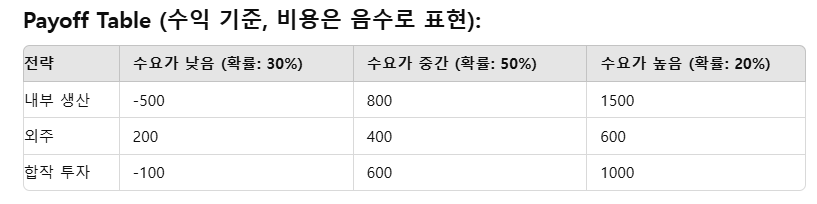

In [2]:
import numpy as np
import pandas as pd

# Payoff Table (복잡한 전략 및 수요 시나리오)
payoff_table = pd.DataFrame({
    '수요가 낮음': [-500, 200, -100],
    '수요가 중간': [800, 400, 600],
    '수요가 높음': [1500, 600, 1000]
}, index=['내부 생산', '외주', '합작 투자'])

# 각 수요 시나리오의 확률 (예: 낮음 30%, 중간 50%, 높음 20%)
probabilities = [0.3, 0.5, 0.2]

# Maximin 기준
def maximin(payoff_table):
    min_payoffs = payoff_table.min(axis=1)
    return min_payoffs.idxmax(), min_payoffs.max()

# Maximax 기준
def maximax(payoff_table):
    max_payoffs = payoff_table.max(axis=1)
    return max_payoffs.idxmax(), max_payoffs.max()

# Minimax Regret 기준
def minimax_regret(payoff_table):
    max_in_columns = payoff_table.max(axis=0)
    regret_table = max_in_columns - payoff_table
    max_regrets = regret_table.max(axis=1)
    return max_regrets.idxmin(), max_regrets.min()

# 기대값 기준
def expected_value(payoff_table, probabilities):
    expected_values = payoff_table.mul(probabilities, axis=1).sum(axis=1)
    return expected_values.idxmax(), expected_values.max()

# 결과 출력
print("Payoff Table:")
print(payoff_table)

# Maximin 결과
maximin_decision, maximin_value = maximin(payoff_table)
print(f"\nMaximin 기준: {maximin_decision} 선택, 이익: {maximin_value}")

# Maximax 결과
maximax_decision, maximax_value = maximax(payoff_table)
print(f"\nMaximax 기준: {maximax_decision} 선택, 이익: {maximax_value}")

# Minimax Regret 결과
minimax_decision, minimax_value = minimax_regret(payoff_table)
print(f"\nMinimax Regret 기준: {minimax_decision} 선택, 후회: {minimax_value}")

# 기대값 기준
expected_decision, expected_value = expected_value(payoff_table, probabilities)
print(f"\nExpected Value 기준: {expected_decision} 선택, 기대값: {expected_value}")


Payoff Table:
       수요가 낮음  수요가 중간  수요가 높음
내부 생산    -500     800    1500
외주        200     400     600
합작 투자    -100     600    1000

Maximin 기준: 외주 선택, 이익: 200

Maximax 기준: 내부 생산 선택, 이익: 1500

Minimax Regret 기준: 합작 투자 선택, 후회: 500

Expected Value 기준: 내부 생산 선택, 기대값: 550.0


####각 의사결정 기준 설명:
1. Maximin 기준: 각 전략의 최악의 결과 중에서 가장 좋은 최악의 결과를 선택합니다. 이 기준에 따르면 "합작 투자"가 선택됩니다.

2. Maximax 기준: 각 전략의 최고 결과 중에서 가장 좋은 결과를 선택합니다. 이 기준에 따르면 "내부 생산"이 선택됩니다.

3. Minimax Regret 기준: 후회값(최적의 선택과 비교해 얼마나 손해를 보는지)을 최소화하는 전략을 선택합니다. 이 기준에 따르면 "합작 투자"가 선택됩니다.

4. 기대값 기준: 각 수요 시나리오의 확률을 곱해 기대값을 계산합니다. 이 기준에 따르면 "합작 투자"가 가장 높은 기대값(420.0)을 가집니다.

####사례에 대한 추가 설명:
- 내부 생산은 높은 수요 시나리오에서 큰 수익을 가져올 수 있지만, 수요가 낮을 경우 큰 손실을 입을 수 있는 위험한 선택입니다.
- 외주는 모든 시나리오에서 안정적이지만, 최대 수익이 비교적 낮습니다.
- 합작 투자는 중간 수준의 위험과 보상을 가지고 있으며, 기대값을 기준으로 가장 좋은 선택으로 나타났습니다.